<a href="https://colab.research.google.com/github/ankitg-02/kaggle-competition/blob/main/Loan_approval_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

In [76]:
test_data = pd.read_csv(r'test.csv')
train_data = pd.read_csv(r'train.csv')

**For Test Data**

In [77]:
test_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [78]:
test_dataframe=pd.DataFrame(test_data)

In [79]:
test_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [80]:
test_dataframe.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [81]:
for i in test_dataframe.columns:
    print(i,':\n',test_dataframe[i].unique())

id :
 [58645 58646 58647 ... 97740 97741 97742]
person_age :
 [23 26 33 32 22 29 25 27 21 38 30 42 28 24 36 37 31 35 40 43 46 39 51 48
 34 50 54 41 44 52 45 47 55 64 57 20 62 53 58 49 70 60 63 59 61 65 56 66
 69 68 84 94]
person_income :
 [ 69000  96000  30000 ...  54480 510000  70399]
person_home_ownership :
 ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
person_emp_length :
 [ 3.  6.  5.  4.  8. 10.  0.  1.  2. 12. 14.  9. 13.  7. 11. 15. 24. 21.
 42. 16. 18. 19. 17. 20. 31. 23. 22. 26. 29. 28. 25.]
loan_intent :
 ['HOMEIMPROVEMENT' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION' 'EDUCATION'
 'MEDICAL']
loan_grade :
 ['F' 'C' 'E' 'A' 'D' 'B' 'G']
loan_amnt :
 [25000 10000  4000  7000 15000 22000  8000  6250  7200 14400 12000 11500
 15250  6000  9000  3000 20000  2950  1000  6500 14000  5000  7500 24250
  2500  2400  9600 13000  5400  4800  2000  5500  3600  1500  4200  8500
 10200 11000 21000  4500 12800 10800 17000 18000  8400  2100 10400  3500
 13175 11300 35000 17500  4900  9350 14500 10750 13200 240

In [82]:
test_dataframe.describe(include="all")

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,39098.000000,39098.000000,3.909800e+04,39098,39098.000000,39098,39098,39098.000000,39098.000000,39098.000000,39098,39098.000000
unique,NaN,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,NaN,20280,NaN,8076,14005,NaN,NaN,NaN,33227,NaN
mean,78193.500000,27.566781,6.406046e+04,NaN,4.687068,NaN,NaN,9251.466188,10.661216,0.159573,NaN,5.830707
std,11286.764749,6.032761,3.795583e+04,NaN,3.868395,NaN,NaN,5576.254680,3.020220,0.091633,NaN,4.072157
min,58645.000000,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,700.000000,5.420000,0.000000,NaN,2.000000
25%,68419.250000,23.000000,4.200000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.880000,0.090000,NaN,3.000000
50%,78193.500000,26.000000,5.800000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.750000,0.140000,NaN,4.000000
75%,87967.750000,30.000000,7.588500e+04,NaN,7.000000,NaN,NaN,12000.000000,12.990000,0.210000,NaN,8.000000


In [83]:
mod_test_data=test_dataframe.drop(columns=['id'],axis=1)

In [84]:
mod_test_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [85]:
mod_test_data.describe(include="all")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,39098.000000,3.909800e+04,39098,39098.000000,39098,39098,39098.000000,39098.000000,39098.000000,39098,39098.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,20280,NaN,8076,14005,NaN,NaN,NaN,33227,NaN
mean,27.566781,6.406046e+04,NaN,4.687068,NaN,NaN,9251.466188,10.661216,0.159573,NaN,5.830707
std,6.032761,3.795583e+04,NaN,3.868395,NaN,NaN,5576.254680,3.020220,0.091633,NaN,4.072157
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,700.000000,5.420000,0.000000,NaN,2.000000
25%,23.000000,4.200000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.880000,0.090000,NaN,3.000000
50%,26.000000,5.800000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.750000,0.140000,NaN,4.000000
75%,30.000000,7.588500e+04,NaN,7.000000,NaN,NaN,12000.000000,12.990000,0.210000,NaN,8.000000


In [86]:
def info(df):
  for i in df.columns:
      if df[i].dtype=='int':
          print(i,':\n',f"mean of {i} :",df[i].mean(),'\n',
                f"median of {i} :",df[i].median(),'\n',
                f"mode of {i} :",df[i].mode(),'\n',
                f"standardisation of {i}:",df[i].std(),'\n',
                f"variance of {i}:",df[i].var(),'\n')
          print('\n')
          q3=df[i].quantile(0.75)
          q1=df[i].quantile(0.25)
          iqr=q3-q1
          upper_limit=q3+1.5*iqr
          lower_limit=q1-1.5*iqr
          print(f'upper limit of {i}:',upper_limit)
          print(f'lower limit of {i}:',lower_limit)
          plt.figure(figsize=(10,5))
          sns.kdeplot(data=df, x=i, hue='cb_person_default_on_file')
          sns.distplot(df[i],bins=10)
          plt.title(f'Distribution of {i}')
          plt.grid(True)
          plt.show()
          print('\n')
      if df[i].dtype=='float':
        print(i,':\n',f"mean of {i} :",df[i].mean(),'\n',
              f"median of {i} :",df[i].median(),'\n',
              f"mode of {i} :",df[i].mode(),'\n',
              f"standardisation of {i}:",df[i].std(),'\n',
              f"variance of {i}:",df[i].var(),'\n')
        print('\n')
        q3=df[i].quantile(0.75)
        q1=df[i].quantile(0.25)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        print(f'upper limit of {i}:',upper_limit)
        print(f'lower limit of {i}:',lower_limit)
        plt.figure(figsize=(10, 5))
        sns.kdeplot(data=df, x=i, hue='cb_person_default_on_file')
        sns.distplot(df[i], bins=10)
        plt.xticks(rotation=90)
        plt.title(f'Distribution of {i}')
        plt.grid(True)
        plt.show()
        print('\n')
      if df[i].dtype=='object':
        print(i,':\n',df[i].value_counts())
        print('\n',f'Maximum value of{i}:',np.max(df[i].value_counts()))
        print(f'Minimum value of{i}:',np.min(df[i].value_counts()))
        print('\n')
        plt.figure(figsize=(10,5))
        sns.countplot(df[i],palette='hls')
        plt.xticks(rotation=90)
        plt.title(f'Distribution of {i}')
        plt.show()
        print('\n')

person_age :
 mean of person_age : 27.566780909509436 
 median of person_age : 26.0 
 mode of person_age : 0    23
Name: person_age, dtype: int64 
 standardisation of person_age: 6.032760769126803 
 variance of person_age: 36.394202497515415 



upper limit of person_age: 40.5
lower limit of person_age: 12.5


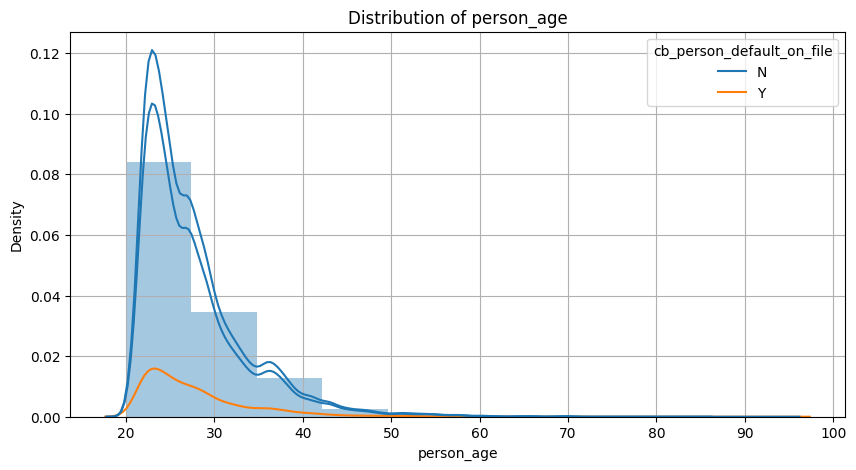



person_income :
 mean of person_income : 64060.4608419868 
 median of person_income : 58000.0 
 mode of person_income : 0    60000
Name: person_income, dtype: int64 
 standardisation of person_income: 37955.82870531899 
 variance of person_income: 1440644932.7075171 



upper limit of person_income: 126712.5
lower limit of person_income: -8827.5


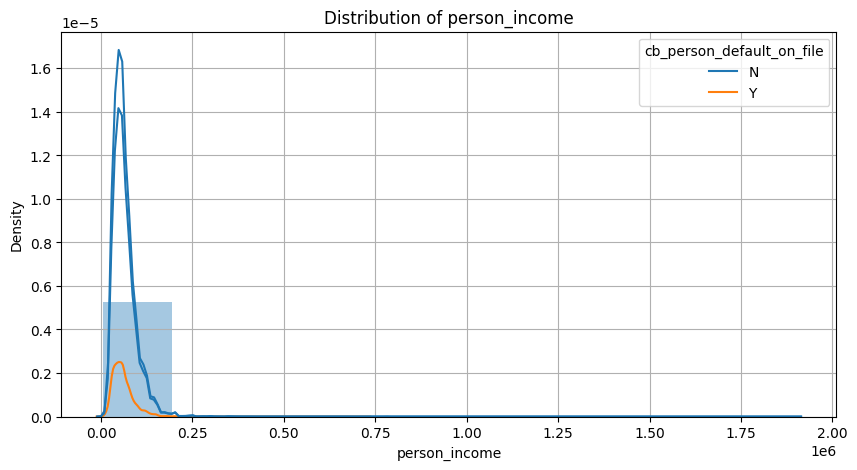



person_home_ownership :
 person_home_ownership
RENT        20280
MORTGAGE    16683
OWN          2056
OTHER          79
Name: count, dtype: int64

 Maximum value ofperson_home_ownership: 20280
Minimum value ofperson_home_ownership: 79




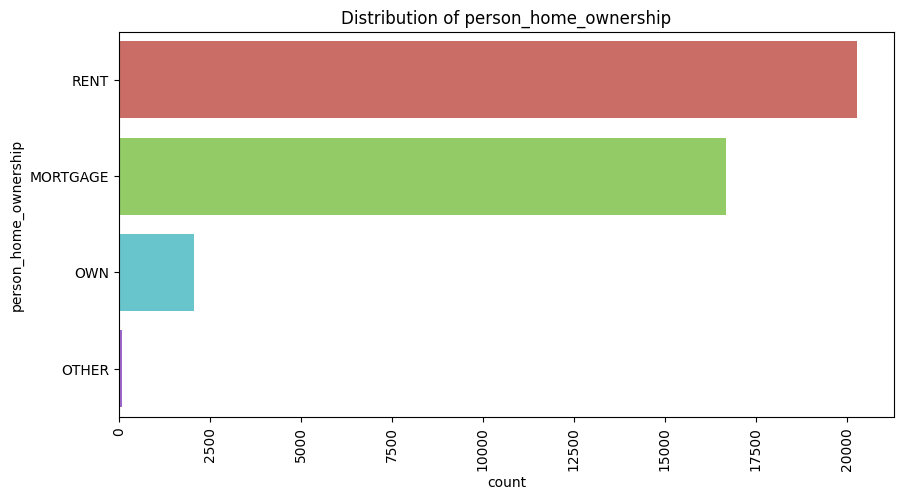



person_emp_length :
 mean of person_emp_length : 4.687068392245128 
 median of person_emp_length : 4.0 
 mode of person_emp_length : 0    0.0
Name: person_emp_length, dtype: float64 
 standardisation of person_emp_length: 3.8683950398901477 
 variance of person_emp_length: 14.964480184646696 



upper limit of person_emp_length: 14.5
lower limit of person_emp_length: -5.5


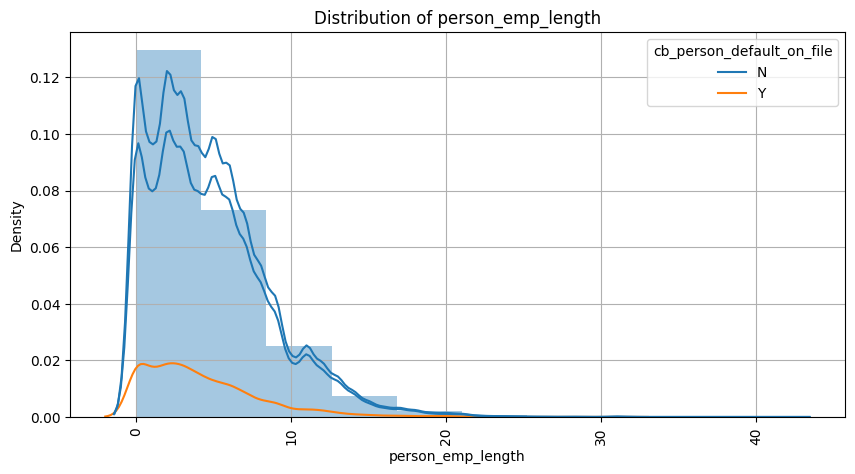



loan_intent :
 loan_intent
EDUCATION            8076
MEDICAL              7447
PERSONAL             6815
VENTURE              6632
DEBTCONSOLIDATION    5915
HOMEIMPROVEMENT      4213
Name: count, dtype: int64

 Maximum value ofloan_intent: 8076
Minimum value ofloan_intent: 4213




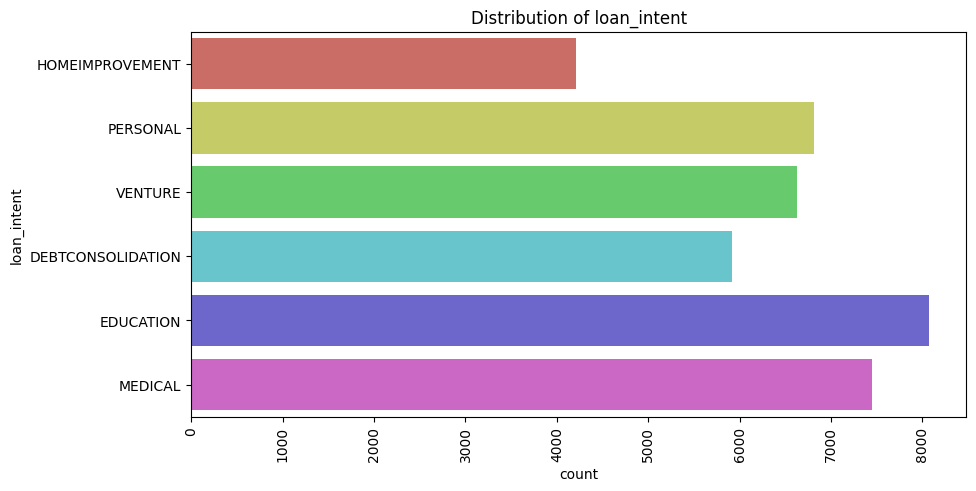



loan_grade :
 loan_grade
A    14005
B    13604
C     7460
D     3269
E      637
F      105
G       18
Name: count, dtype: int64

 Maximum value ofloan_grade: 14005
Minimum value ofloan_grade: 18




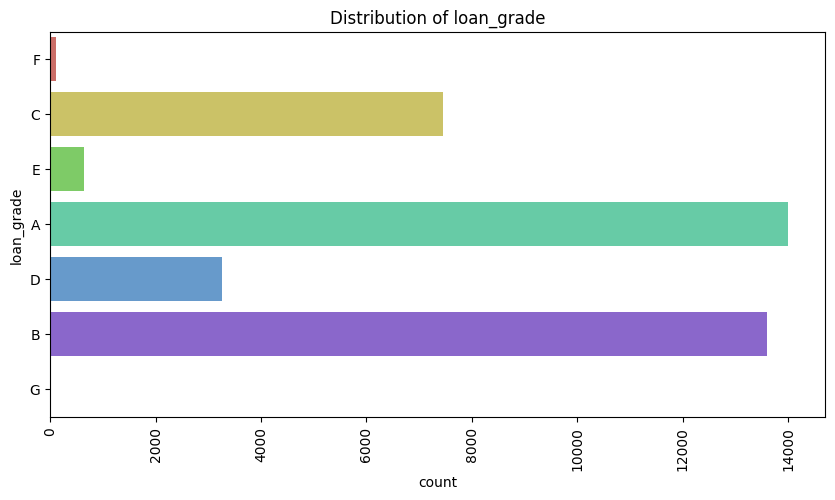



loan_amnt :
 mean of loan_amnt : 9251.466187528775 
 median of loan_amnt : 8000.0 
 mode of loan_amnt : 0    10000
Name: loan_amnt, dtype: int64 
 standardisation of loan_amnt: 5576.254679555594 
 variance of loan_amnt: 31094616.251265656 



upper limit of loan_amnt: 22500.0
lower limit of loan_amnt: -5500.0


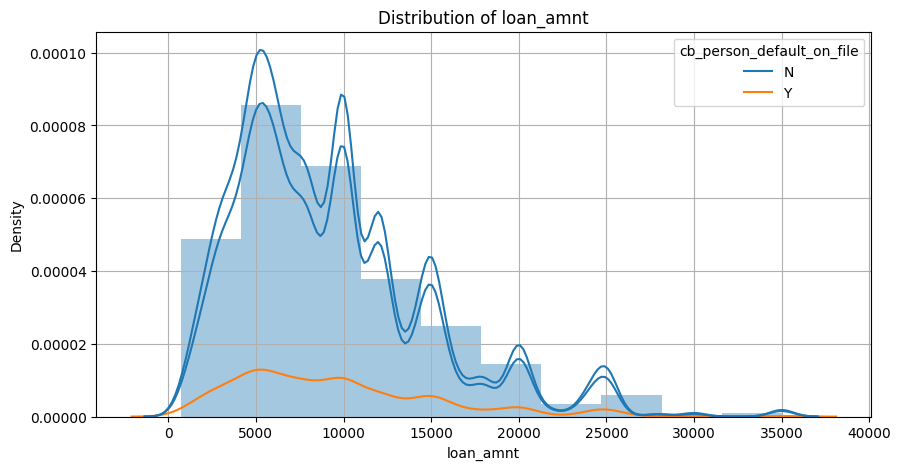



loan_int_rate :
 mean of loan_int_rate : 10.661215918972838 
 median of loan_int_rate : 10.75 
 mode of loan_int_rate : 0    10.99
Name: loan_int_rate, dtype: float64 
 standardisation of loan_int_rate: 3.020219615559393 
 variance of loan_int_rate: 9.121726526209727 



upper limit of loan_int_rate: 20.655
lower limit of loan_int_rate: 0.21499999999999897


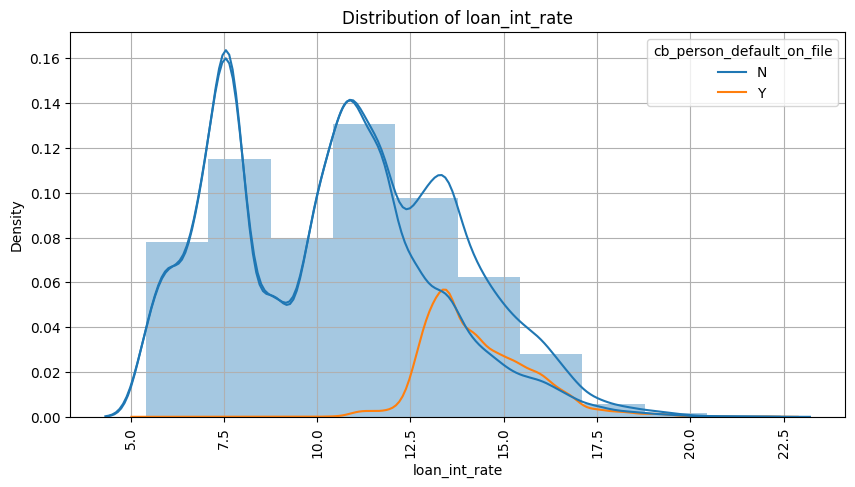



loan_percent_income :
 mean of loan_percent_income : 0.1595732774054939 
 median of loan_percent_income : 0.14 
 mode of loan_percent_income : 0    0.13
Name: loan_percent_income, dtype: float64 
 standardisation of loan_percent_income: 0.09163339703758701 
 variance of loan_percent_income: 0.00839667945264806 



upper limit of loan_percent_income: 0.39
lower limit of loan_percent_income: -0.09


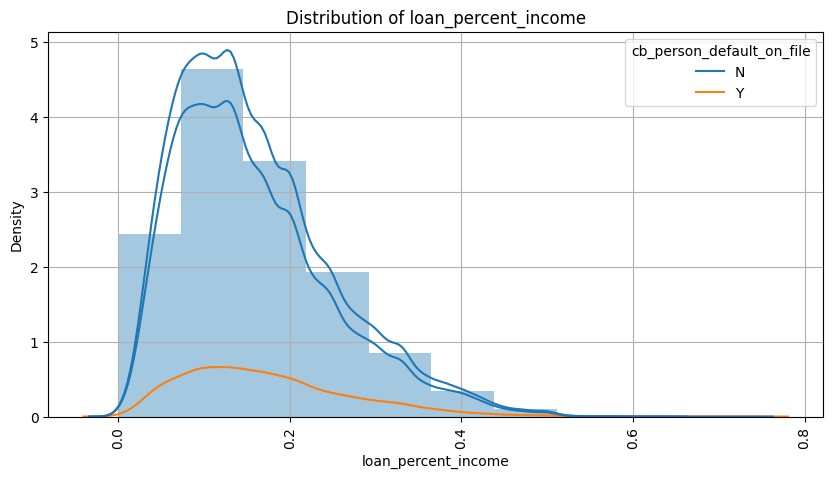



cb_person_default_on_file :
 cb_person_default_on_file
N    33227
Y     5871
Name: count, dtype: int64

 Maximum value ofcb_person_default_on_file: 33227
Minimum value ofcb_person_default_on_file: 5871




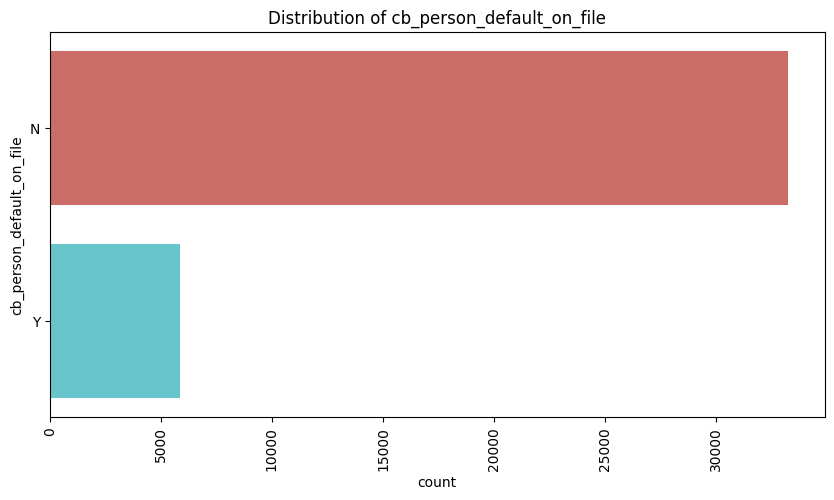



cb_person_cred_hist_length :
 mean of cb_person_cred_hist_length : 5.830707453066653 
 median of cb_person_cred_hist_length : 4.0 
 mode of cb_person_cred_hist_length : 0    2
Name: cb_person_cred_hist_length, dtype: int64 
 standardisation of cb_person_cred_hist_length: 4.072156720755155 
 variance of cb_person_cred_hist_length: 16.582460358391373 



upper limit of cb_person_cred_hist_length: 15.5
lower limit of cb_person_cred_hist_length: -4.5


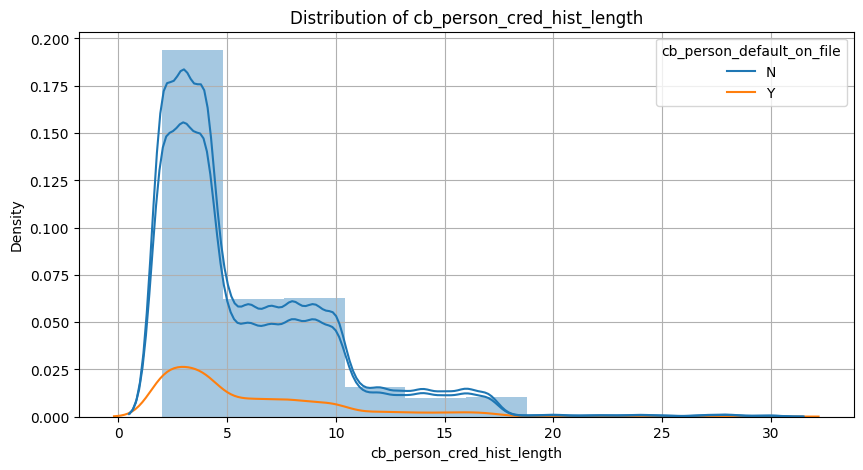

In [87]:
info(mod_test_data)

In [88]:
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


**For Train Data**

In [89]:
mod_train_data=pd.DataFrame(train_data)

In [90]:
mod_train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [91]:
mod_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [92]:
mod_train_data.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [93]:
for i in mod_train_data.columns:
    print(i,':\n',mod_train_data[i].unique(),'\n')

id :
 [    0     1     2 ... 58642 58643 58644] 

person_age :
 [ 37  22  29  30  27  25  21  35  31  26  28  32  23  24  33  44  38  43
  46  48  36  41  34  40  47  42  51  50  39  56  60  49  58  54  45  59
  65  53  55  57  52  62  64  84  70  66  73  69  61  20  80  76 123] 

person_income :
 [ 35000  56000  28800 ...  44955  90730 124600] 

person_home_ownership :
 ['RENT' 'OWN' 'MORTGAGE' 'OTHER'] 

person_emp_length :
 [  0.   6.   8.  14.   2.   9.  11.   5.   1.  13.   3.  10.  12.   4.
   7.  21.  17.  16.  18.  19.  15.  20.  23.  24.  26.  22.  25.  41.
  27.  28.  35.  29.  30.  31. 123.  39.] 

loan_intent :
 ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT'] 

loan_grade :
 ['B' 'C' 'A' 'D' 'E' 'F' 'G'] 

loan_amnt :
 [ 6000  4000 12000  9000  2500  5000 15000 12800 10000 16000  7300 17000
  5950  4800  3200  7000  3000  3500 14000  2800  2000  5500 14400 15900
 12500  8000  2400 20000 14125  9600 17200  4200  7200 18000 23500  3550
  98

In [94]:
mod_train_data.describe(include="all")

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645,58645.000000,58645,58645,58645.000000,58645.000000,58645.000000,58645,58645.000000,58645.000000
unique,NaN,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,N,NaN,NaN
freq,NaN,NaN,NaN,30594,NaN,12271,20984,NaN,NaN,NaN,49943,NaN,NaN
mean,29322.000000,27.550857,6.404617e+04,NaN,4.701015,NaN,NaN,9217.556518,10.677874,0.159238,NaN,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,NaN,3.959784,NaN,NaN,5563.807384,3.034697,0.091692,NaN,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,NaN,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.880000,0.090000,NaN,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.750000,0.140000,NaN,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,NaN,7.000000,NaN,NaN,12000.000000,12.990000,0.210000,NaN,8.000000,0.000000


id :
 mean of id : 29322.0 
 median of id : 29322.0 
 mode of id : 0            0
1            1
2            2
3            3
4            4
         ...  
58640    58640
58641    58641
58642    58642
58643    58643
58644    58644
Name: id, Length: 58645, dtype: int64 
 standardisation of id: 16929.4976052648 
 variance of id: 286607889.1666667 



upper limit of id: 87966.0
lower limit of id: -29322.0


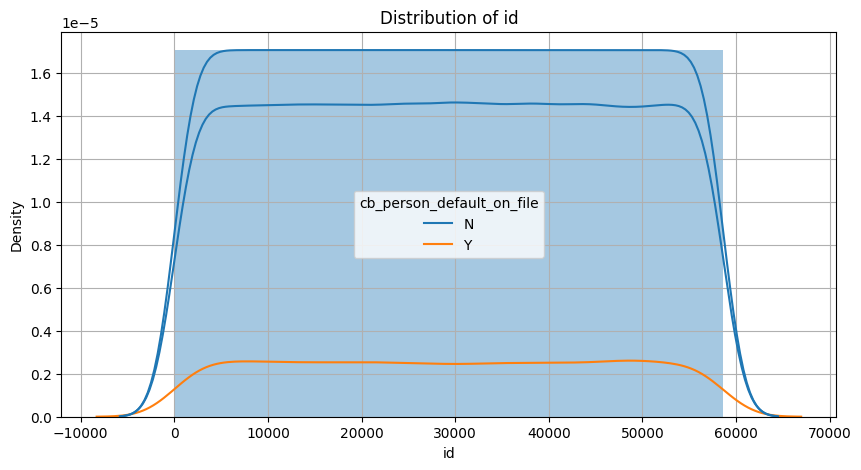



person_age :
 mean of person_age : 27.550856850541393 
 median of person_age : 26.0 
 mode of person_age : 0    23
Name: person_age, dtype: int64 
 standardisation of person_age: 6.033215771226305 
 variance of person_age: 36.39969254217382 



upper limit of person_age: 40.5
lower limit of person_age: 12.5


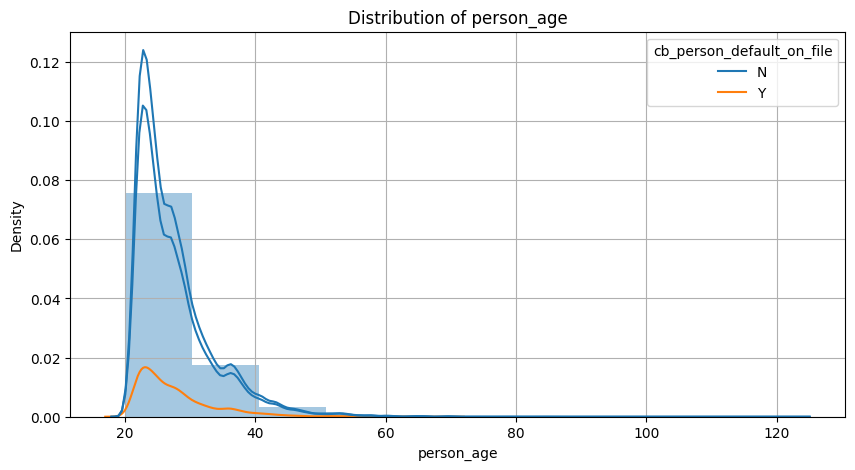



person_income :
 mean of person_income : 64046.17287066246 
 median of person_income : 58000.0 
 mode of person_income : 0    60000
Name: person_income, dtype: int64 
 standardisation of person_income: 37931.106978500095 
 variance of person_income: 1438768876.6144187 



upper limit of person_income: 126000.0
lower limit of person_income: -8400.0


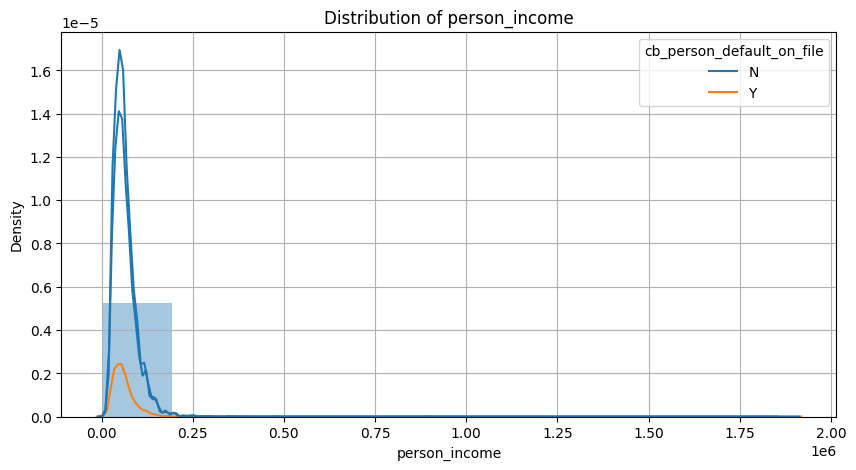



person_home_ownership :
 person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

 Maximum value ofperson_home_ownership: 30594
Minimum value ofperson_home_ownership: 89




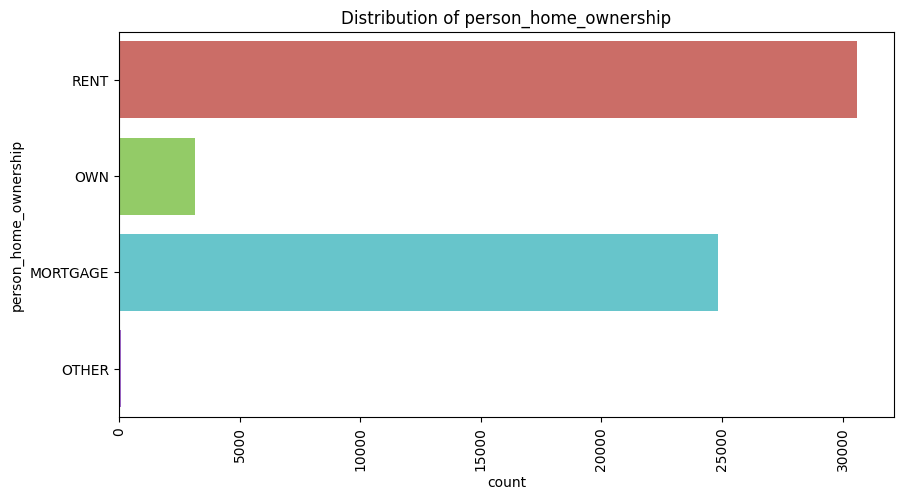



person_emp_length :
 mean of person_emp_length : 4.701014579248017 
 median of person_emp_length : 4.0 
 mode of person_emp_length : 0    0.0
Name: person_emp_length, dtype: float64 
 standardisation of person_emp_length: 3.9597843444189302 
 variance of person_emp_length: 15.679892054305258 



upper limit of person_emp_length: 14.5
lower limit of person_emp_length: -5.5


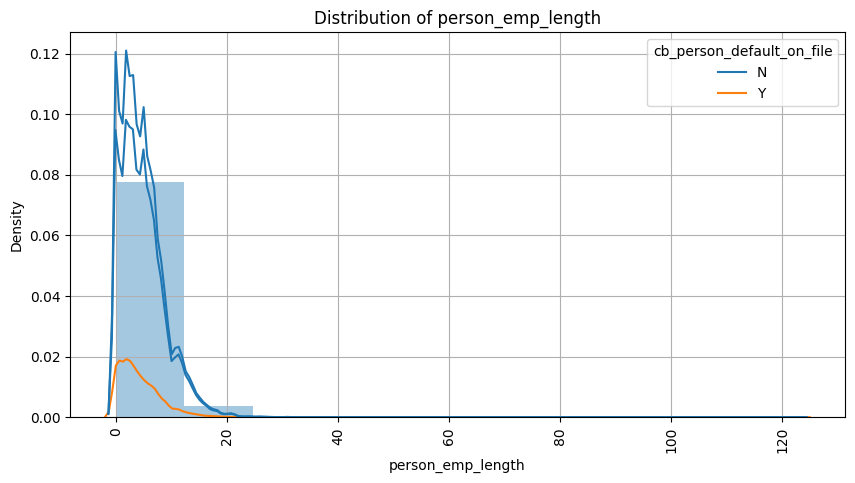



loan_intent :
 loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

 Maximum value ofloan_intent: 12271
Minimum value ofloan_intent: 6280




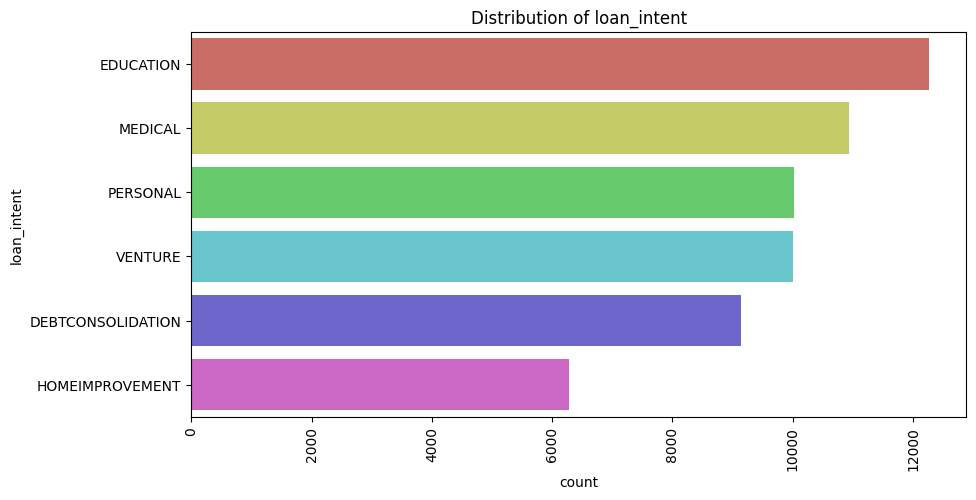



loan_grade :
 loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64

 Maximum value ofloan_grade: 20984
Minimum value ofloan_grade: 33




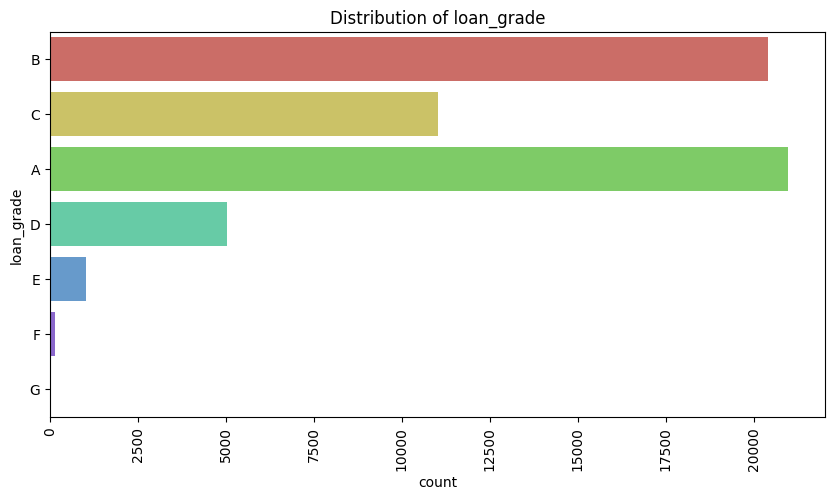



loan_amnt :
 mean of loan_amnt : 9217.556518032228 
 median of loan_amnt : 8000.0 
 mode of loan_amnt : 0    10000
Name: loan_amnt, dtype: int64 
 standardisation of loan_amnt: 5563.807384163861 
 variance of loan_amnt: 30955952.6080763 



upper limit of loan_amnt: 22500.0
lower limit of loan_amnt: -5500.0


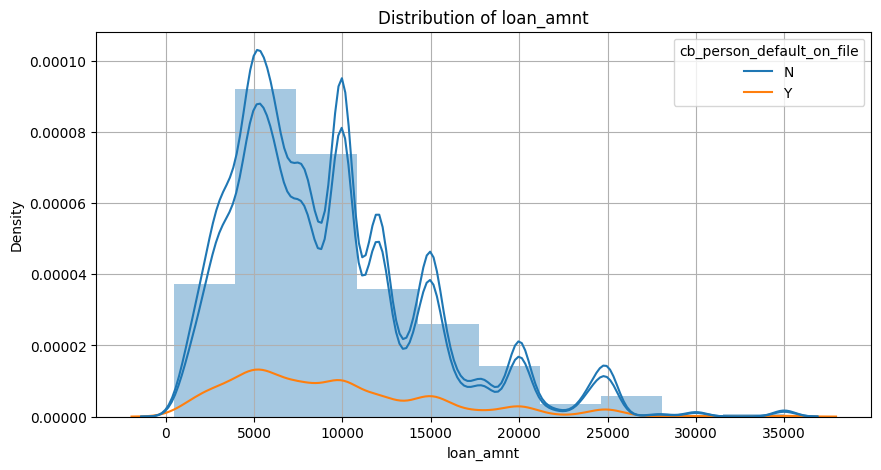



loan_int_rate :
 mean of loan_int_rate : 10.67787449910478 
 median of loan_int_rate : 10.75 
 mode of loan_int_rate : 0    10.99
Name: loan_int_rate, dtype: float64 
 standardisation of loan_int_rate: 3.0346972031377084 
 variance of loan_int_rate: 9.209387114731829 



upper limit of loan_int_rate: 20.655
lower limit of loan_int_rate: 0.21499999999999897


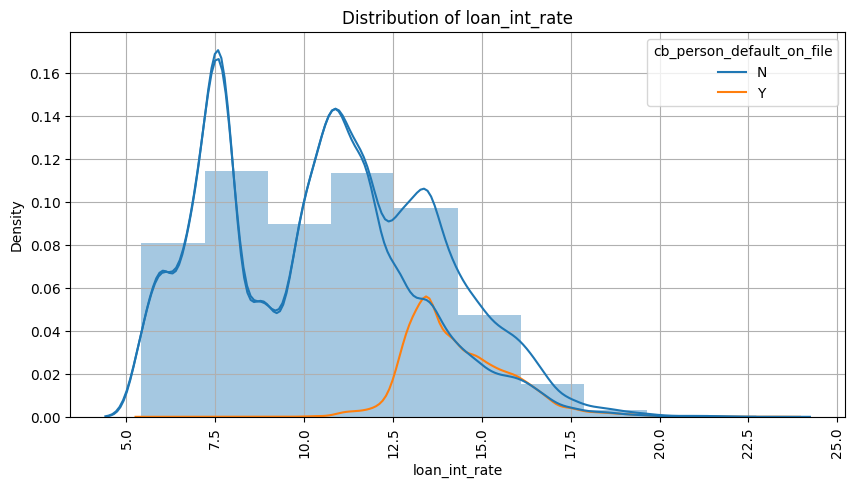



loan_percent_income :
 mean of loan_percent_income : 0.15923751385454857 
 median of loan_percent_income : 0.14 
 mode of loan_percent_income : 0    0.1
Name: loan_percent_income, dtype: float64 
 standardisation of loan_percent_income: 0.09169179303584088 
 variance of loan_percent_income: 0.008407384910127479 



upper limit of loan_percent_income: 0.39
lower limit of loan_percent_income: -0.09


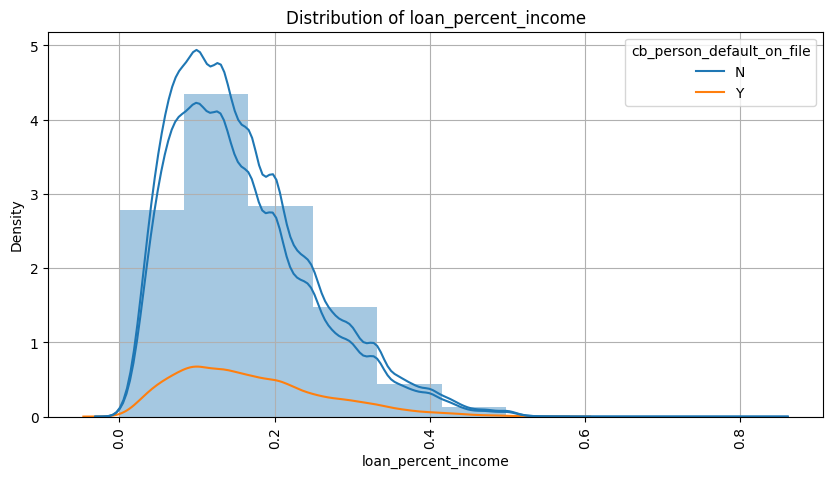



cb_person_default_on_file :
 cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64

 Maximum value ofcb_person_default_on_file: 49943
Minimum value ofcb_person_default_on_file: 8702




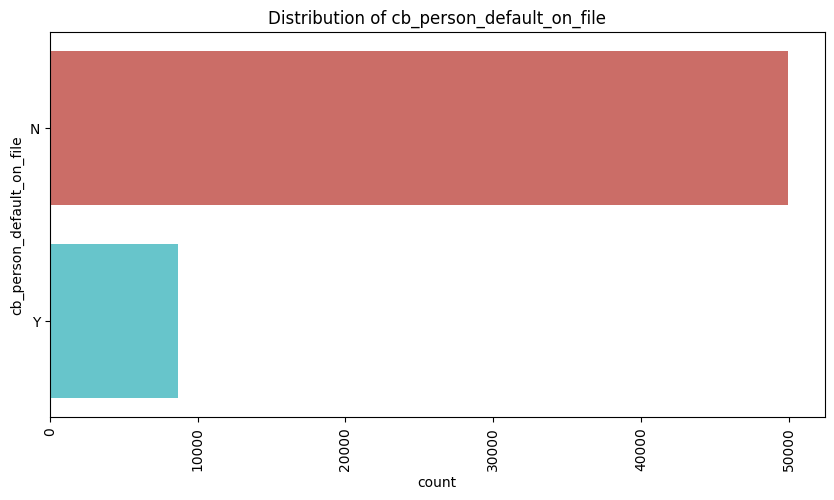



cb_person_cred_hist_length :
 mean of cb_person_cred_hist_length : 5.813556142893682 
 median of cb_person_cred_hist_length : 4.0 
 mode of cb_person_cred_hist_length : 0    3
Name: cb_person_cred_hist_length, dtype: int64 
 standardisation of cb_person_cred_hist_length: 4.029196153525222 
 variance of cb_person_cred_hist_length: 16.23442164358244 



upper limit of cb_person_cred_hist_length: 15.5
lower limit of cb_person_cred_hist_length: -4.5


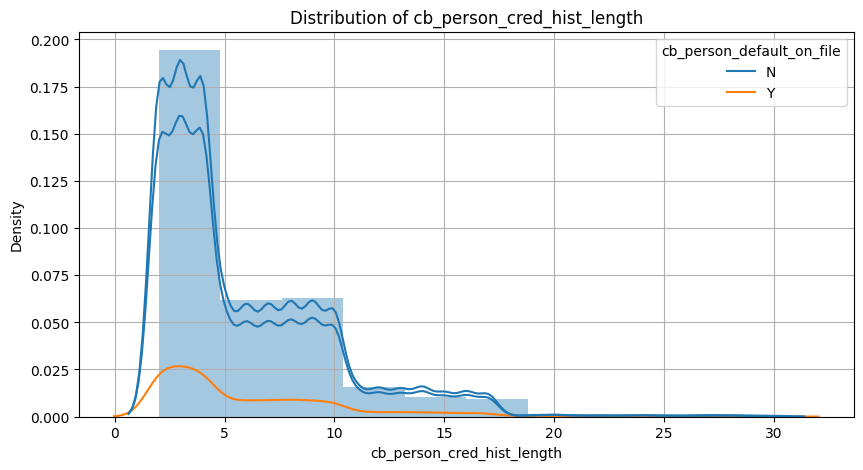



loan_status :
 mean of loan_status : 0.14238212976383324 
 median of loan_status : 0.0 
 mode of loan_status : 0    0
Name: loan_status, dtype: int64 
 standardisation of loan_status: 0.3494446180776064 
 variance of loan_status: 0.12211154110340422 



upper limit of loan_status: 0.0
lower limit of loan_status: 0.0


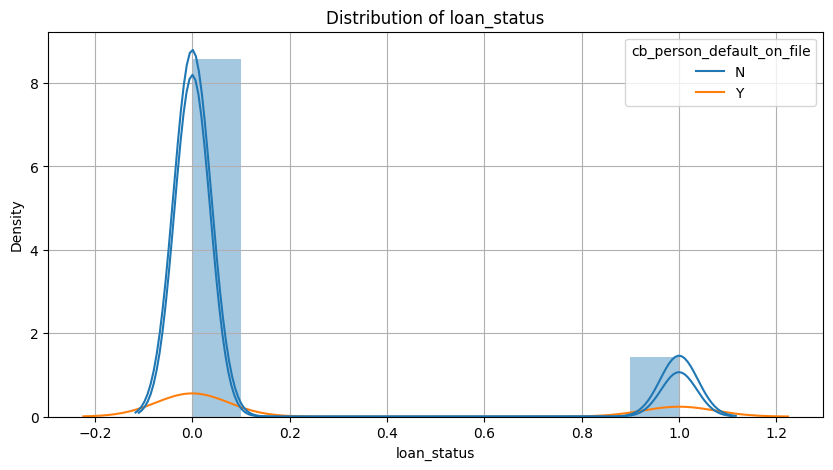

In [95]:
info(mod_train_data)

In [96]:
for i in mod_train_data.columns[[2,4,5,9]]:
    print(i,':\n',mod_train_data[i].value_counts(),'\n')

person_income :
 person_income
60000     4164
50000     2992
30000     2200
40000     1981
70000     1876
          ... 
48602        1
46151        1
128474       1
43900        1
124600       1
Name: count, Length: 2641, dtype: int64 

person_emp_length :
 person_emp_length
0.0      7586
2.0      7270
3.0      6475
5.0      5839
4.0      5461
1.0      5203
6.0      4902
7.0      4275
8.0      3015
9.0      2290
11.0     1491
12.0     1105
10.0     1072
13.0      797
14.0      590
15.0      367
16.0      280
17.0      168
18.0      153
21.0       78
19.0       72
20.0       65
22.0       20
24.0       14
23.0       12
26.0       11
25.0        8
27.0        7
31.0        5
28.0        4
30.0        2
123.0       2
41.0        2
29.0        2
35.0        1
39.0        1
Name: count, dtype: int64 

loan_intent :
 loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Na

In [97]:
mod_train_data=mod_train_data[
    (mod_train_data['person_age']>=12.5) & (mod_train_data['person_age']<=40.5) &
    (mod_train_data['person_income']>0) & (mod_train_data['person_income']<=126000.0) &
    (mod_train_data['loan_amnt']>0) & (mod_train_data['loan_amnt']<=22500.0) &
    (mod_train_data['cb_person_cred_hist_length']>0) & (mod_train_data['cb_person_cred_hist_length']<=15.5) &
    (mod_train_data['person_emp_length']>0) & (mod_train_data['person_emp_length']<=14.5) &
    (mod_train_data['loan_int_rate']>=0.21499999999999897) & (mod_train_data['loan_int_rate']<=20.655) &
    (mod_train_data['loan_percent_income']>0) & (mod_train_data['loan_percent_income']<=0.39)
]

In [98]:
s=StandardScaler()
for i in mod_train_data.[1:13]:
    if mod_train_data[i].dtype=="int":
        mod_train_data[i]=s.fit_transform(mod_train_data[[i]]).astype('int')
    elif mod_train_data[i].dtype=="float":
        mod_train_data[i]=s.fit_transform(mod_train_data[[i]]).astype('float')

In [99]:
oe = OrdinalEncoder()
make_column_transformerod_1=mod_train_data.drop('id',axis=1)
make_column_transformerod_1['person_home_ownership']=oe.fit_transform(make_column_transformerod_1[['person_home_ownership']])
make_column_transformerod_1['loan_intent']=oe.fit_transform(make_column_transformerod_1[['loan_intent']])
make_column_transformerod_1['loan_grade']=oe.fit_transform(make_column_transformerod_1[['loan_grade']])
make_column_transformerod_1['cb_person_default_on_file']=oe.fit_transform(make_column_transformerod_1[['cb_person_default_on_file']])

In [100]:
make_column_transformerod_1.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
2087,0,-1,3.0,0.301414,1.0,0.0,0,-1.519951,1.574968,0.0,-1,0
11479,0,1,0.0,0.942611,5.0,0.0,0,-1.311182,-0.278968,0.0,1,0
48540,0,2,0.0,0.942611,2.0,0.0,0,-0.893643,-0.526160,0.0,0,0
13018,-1,0,3.0,-0.019185,4.0,0.0,0,-0.416456,0.339011,0.0,-1,0
35579,0,0,3.0,-1.301580,3.0,1.0,0,0.610821,-0.155373,0.0,-1,0


In [101]:
for i in make_column_transformerod_1.columns[[2,4,5,9]]:
    print(i,':\n',make_column_transformerod_1[i].value_counts(),'\n')

person_home_ownership :
 person_home_ownership
3.0    22193
0.0    18718
2.0     2326
1.0       61
Name: count, dtype: int64 

loan_intent :
 loan_intent
1.0    9382
3.0    8056
5.0    7410
4.0    7203
0.0    6883
2.0    4364
Name: count, dtype: int64 

loan_grade :
 loan_grade
0.0    16025
1.0    15043
2.0     8014
3.0     3459
4.0      673
5.0       72
6.0       12
Name: count, dtype: int64 

cb_person_default_on_file :
 cb_person_default_on_file
0.0    37105
1.0     6193
Name: count, dtype: int64 



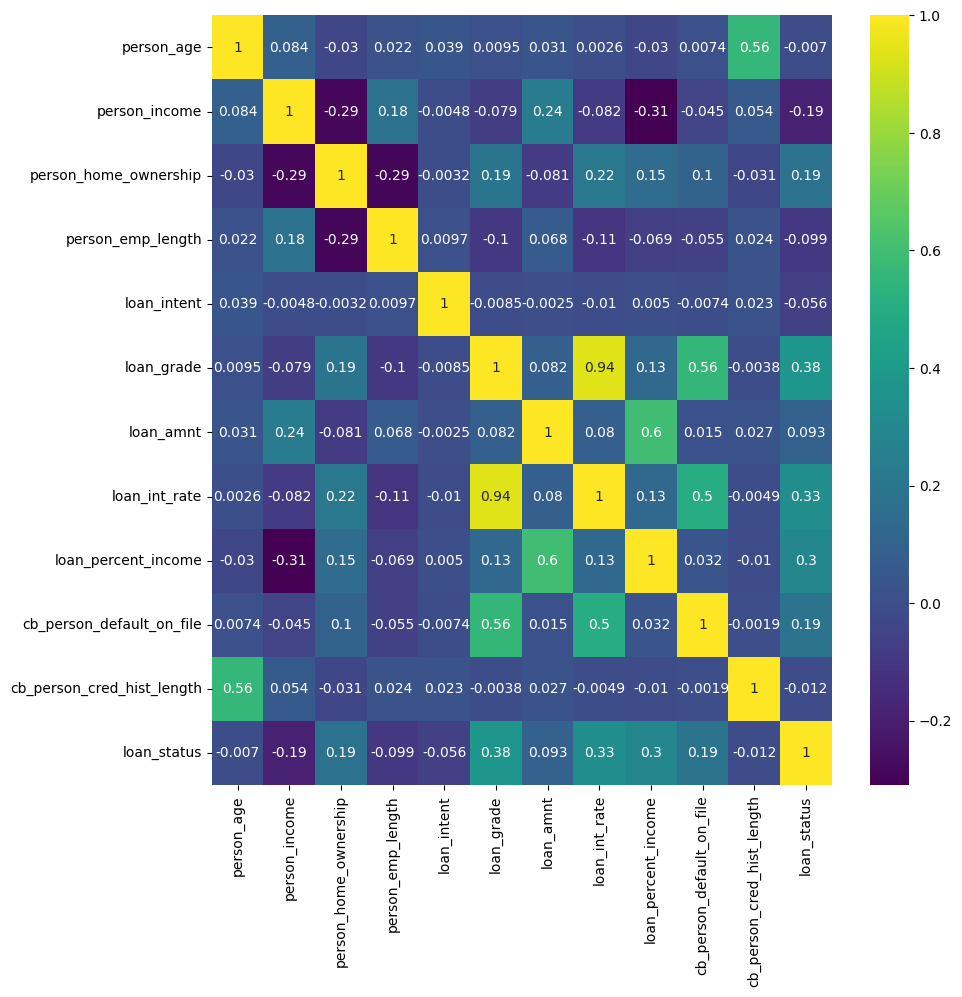

In [102]:
make_column_transformerod_1=make_column_transformerod_1.drop(['loan_status'],axis=1)
make_column_transformerod_1['loan_status']=train_data['loan_status']
make_column_transformerod_1['loan_status'].value_counts()
le=LabelEncoder()
make_column_transformerod_1['loan_status']=le.fit_transform(make_column_transformerod_1['loan_status'])
plt.figure(figsize=(10,10))
sns.heatmap(make_column_transformerod_1.corr(),annot=True,cmap='viridis')
plt.show()

In [103]:
x=make_column_transformerod_1.iloc[:,:-1]
y=make_column_transformerod_1['loan_status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4,stratify=y)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.5,random_state=4,stratify=y)

In [104]:
x_test.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
26808,0,1,0.0,0.301414,4.0,0.0,1,-1.022881,0.091819,0.0,0
19034,0,0,3.0,1.263210,4.0,0.0,0,-1.016254,-0.402564,0.0,0
35649,0,0,3.0,0.301414,4.0,1.0,0,0.044162,-0.896947,0.0,0
55959,0,-1,0.0,0.942611,1.0,0.0,0,-1.016254,1.451373,0.0,1
16869,1,0,3.0,0.301414,5.0,0.0,0,-1.211768,-0.402564,0.0,0


In [105]:
model1=LogisticRegression()
pred1=model1.fit(x_train,y_train).predict(x_test)
print("For Test Set")
print('Accuracy  score of Logistic model:',accuracy_score(y_test,pred1))
print('Recall score of Logistic model:',recall_score(y_test,pred1))
print('F1 score of Logistic model:',f1_score(y_test,pred1))
print('Precision score of Logistic model:',precision_score(y_test,pred1))
print('\n')
print("For Validation Set")
pred11=model1.fit(x_train,y_train).predict(x_val)
print('Accuracy  score of Logistic model:',accuracy_score(y_val,pred11))
print('Recall score of Logistic model:',recall_score(y_val,pred11))
print('F1 score of Logistic model:',f1_score(y_val,pred11))
print('Precision score of Logistic model:',precision_score(y_val,pred11))


For Test Set
Accuracy  score of Logistic model: 0.9035219399538106
Recall score of Logistic model: 0.32217973231357555
F1 score of Logistic model: 0.44650546538588937
Precision score of Logistic model: 0.727076591154261


For Validation Set
Accuracy  score of Logistic model: 0.9031825950390319
Recall score of Logistic model: 0.3265774378585086
F1 score of Logistic model: 0.4490010515247108
Precision score of Logistic model: 0.7182506307821699


In [106]:
model2=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,max_features=4, random_state=9)
pred2=model2.fit(x_train,y_train).predict(x_test)
print('For Test Set')
print('Accuracy  score of DecisionTree model:',accuracy_score(y_test,pred2))
print('Recall score of DecisionTree model:',recall_score(y_test,pred2))
print('F1 score of DecisionTree model:',f1_score(y_test,pred2))
print('Precision score of DecisionTree model:',precision_score(y_test,pred2))
print('\n')
pred22=model2.fit(x_train,y_train).predict(x_val)
print("For Validation Set")
print('Accuracy  score of DecisionTree model:',accuracy_score(y_val,pred22))
print('Recall score of DecisionTree model:',recall_score(y_val,pred22))
print('F1 score of DecisionTree model:',f1_score(y_val,pred22))
print('Precision score of DecisionTree model:',precision_score(y_val,pred22))



For Test Set
Accuracy  score of DecisionTree model: 0.9041570438799076
Recall score of DecisionTree model: 0.627151051625239
F1 score of DecisionTree model: 0.6125116713352008
Precision score of DecisionTree model: 0.5985401459854015


For Validation Set
Accuracy  score of DecisionTree model: 0.9044297658090443
Recall score of DecisionTree model: 0.6298279158699809
F1 score of DecisionTree model: 0.6142084654111505
Precision score of DecisionTree model: 0.5993449781659389


In [107]:
model3 = RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=4)
pred3 = model3.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of RandomForest model:',accuracy_score(y_test,pred3))
print('Recall score of RandomForest model:',recall_score(y_test,pred3))
print('F1 score of RandomForest model:',f1_score(y_test,pred3))
print('Precision score of RandomForest model:',precision_score(y_test,pred3))
pred33=model3.fit(x_train,y_train).predict(x_val)
print('\n')
print("For Validation Set")
print('Accuracy  score of RandomForest model:',accuracy_score(y_val,pred33))
print('Recall score of RandomForest model:',recall_score(y_val,pred33))
print('F1 score of RandomForest model:',f1_score(y_val,pred33))
print('Precision score of RandomForest model:',precision_score(y_val,pred33))



Accuracy  score of RandomForest model: 0.9375866050808314
Recall score of RandomForest model: 0.5473231357552581
F1 score of RandomForest model: 0.6793236428359537
Precision score of RandomForest model: 0.8952306489444879


For Validation Set
Accuracy  score of RandomForest model: 0.9397662709593977
Recall score of RandomForest model: 0.551434034416826
F1 score of RandomForest model: 0.6886341929321872
Precision score of RandomForest model: 0.9167196439923713


In [108]:
model4=KNeighborsClassifier()
pred4=model4.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of KNeighbors model:',accuracy_score(y_test,pred4))
print('Recall score of KNeighbors model:',recall_score(y_test,pred4))
print('F1 score of KNeighbors model:',f1_score(y_test,pred4))
print('Precision score of KNeighbors model:',precision_score(y_test,pred4))
pred44=model4.fit(x_train,y_train).predict(x_val)
print("For Validation Set")
print('Accuracy  score of KNeighbors model:',accuracy_score(y_val,pred44))
print('Recall score of KNeighbors model:',recall_score(y_val,pred44))
print('F1 score of KNeighbors model:',f1_score(y_val,pred44))
print('Precision score of KNeighbors model:',precision_score(y_val,pred44))

Accuracy  score of KNeighbors model: 0.9289260969976906
Recall score of KNeighbors model: 0.5487571701720841
F1 score of KNeighbors model: 0.6509781684150836
Precision score of KNeighbors model: 0.8
For Validation Set
Accuracy  score of KNeighbors model: 0.9289112661092891
Recall score of KNeighbors model: 0.5495219885277247
F1 score of KNeighbors model: 0.6512576478585996
Precision score of KNeighbors model: 0.7992213570634038


In [109]:
model5=SVC(kernel='rbf', random_state=42)
pred5=model5.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of SVC model:',accuracy_score(y_test,pred5))
print('Recall score of SVC model:',recall_score(y_test,pred5))
print('F1 score of SVC model:',f1_score(y_test,pred5))
print('Precision score of SVC model:',precision_score(y_test,pred5))
pred55=model5.fit(x_train,y_train).predict(x_val)
print("For Validation Set")
print('Accuracy  score of SVC model:',accuracy_score(y_val,pred55))
print('Recall score of SVC model:',recall_score(y_val,pred55))
print('F1 score of SVC model:',f1_score(y_val,pred55))
print('Precision score of SVC model:',precision_score(y_val,pred55))


Accuracy  score of SVC model: 0.9302540415704388
Recall score of SVC model: 0.518642447418738
F1 score of SVC model: 0.6423919478981646
Precision score of SVC model: 0.843701399688958
For Validation Set
Accuracy  score of SVC model: 0.9305741604693057
Recall score of SVC model: 0.5227533460803059
F1 score of SVC model: 0.6452678782157186
Precision score of SVC model: 0.842786683107275


In [110]:
model6=GaussianNB()
pred6=model6.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of GaussianNB model:',accuracy_score(y_test,pred6))
print('Recall score of GaussianNB model:',recall_score(y_test,pred6))
print('F1 score of GaussianNB model:',f1_score(y_test,pred6))
print('Precision score of GaussianNB model:',precision_score(y_test,pred6))
pred66=model6.fit(x_train,y_train).predict(x_val)
print("For Validation Set")
print('Accuracy  score of GaussianNB model:',accuracy_score(y_val,pred66))
print('Recall score of GaussianNB model:',recall_score(y_val,pred66))
print('F1 score of GaussianNB model:',f1_score(y_val,pred66))
print('Precision score of GaussianNB model:',precision_score(y_val,pred66))

Accuracy  score of GaussianNB model: 0.854041570438799
Recall score of GaussianNB model: 0.6166347992351816
F1 score of GaussianNB model: 0.5050900548159749
Precision score of GaussianNB model: 0.4277188328912467
For Validation Set
Accuracy  score of GaussianNB model: 0.8528800406485288
Recall score of GaussianNB model: 0.6145315487571702
F1 score of GaussianNB model: 0.502265979059228
Precision score of GaussianNB model: 0.4246828752642706


In [111]:
model7=AdaBoostClassifier()
pred7=model7.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of AdaBoost model:',accuracy_score(y_test,pred7))
print('Recall score of AdaBoost model:',recall_score(y_test,pred7))
print('F1 score of AdaBoost model:',f1_score(y_test,pred7))
print('Precision score of AdaBoost model:',precision_score(y_test,pred7))
pred77=model7.fit(x_train,y_train).predict(x_val)
print("For Validation Set")
print('Accuracy  score of AdaBoost model:',accuracy_score(y_val,pred77))
print('Recall score of AdaBoost model:',recall_score(y_val,pred77))
print('F1 score of AdaBoost model:',f1_score(y_val,pred77))
print('Precision score of AdaBoost model:',precision_score(y_val,pred77))

Accuracy  score of AdaBoost model: 0.9270785219399538
Recall score of AdaBoost model: 0.5654875717017208
F1 score of AdaBoost model: 0.6519702397354643
Precision score of AdaBoost model: 0.7696811971372804
For Validation Set
Accuracy  score of AdaBoost model: 0.9275717123192757
Recall score of AdaBoost model: 0.5701720841300191
F1 score of AdaBoost model: 0.6553846153846153
Precision score of AdaBoost model: 0.7705426356589147


In [112]:
model8=GradientBoostingClassifier()
pred8=model8.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of GradientBoosting model:',accuracy_score(y_test,pred8))
print('Recall score of GradientBoosting model:',recall_score(y_test,pred8))
print('F1 score of GradientBoosting model:',f1_score(y_test,pred8))
print('Precision score of GradientBoosting model:',precision_score(y_test,pred8))
pred88=model8.fit(x_train,y_train).predict(x_val)
print("For Validation Set")
print('Accuracy  score of GradientBoosting model:',accuracy_score(y_val,pred88))
print('Recall score of GradientBoosting model:',recall_score(y_val,pred88))
print('F1 score of GradientBoosting model:',f1_score(y_val,pred88))
print('Precision score of GradientBoosting model:',precision_score(y_val,pred88))

Accuracy  score of GradientBoosting model: 0.9470554272517321
Recall score of GradientBoosting model: 0.6281070745697896
F1 score of GradientBoosting model: 0.7413258110014105
Precision score of GradientBoosting model: 0.9043358568479009
For Validation Set
Accuracy  score of GradientBoosting model: 0.9478497852094785
Recall score of GradientBoosting model: 0.6332695984703632
F1 score of GradientBoosting model: 0.745777977932898
Precision score of GradientBoosting model: 0.9069003285870756


In [113]:
model9=ExtraTreesClassifier()
pred9=model9.fit(x_train,y_train).predict(x_test)
print('Accuracy  score of ExtraTrees model:',accuracy_score(y_test,pred9))
print('Recall score of ExtraTrees model:',recall_score(y_test,pred9))
print('F1 score of ExtraTrees model:',f1_score(y_test,pred9))
print('Precision score of ExtraTrees model:',precision_score(y_test,pred9))
pred99=model9.fit(x_train,y_train).predict(x_val)
print("For Validation Set")
print('Accuracy  score of ExtraTrees model:',accuracy_score(y_val,pred99))
print('Recall score of ExtraTrees model:',recall_score(y_val,pred99))
print('F1 score of ExtraTrees model:',f1_score(y_val,pred99))
print('Precision score of ExtraTrees model:',precision_score(y_val,pred99))

Accuracy  score of ExtraTrees model: 0.9404157043879907
Recall score of ExtraTrees model: 0.622848948374761
F1 score of ExtraTrees model: 0.7163276525563497
Precision score of ExtraTrees model: 0.8428201811125485
For Validation Set
Accuracy  score of ExtraTrees model: 0.9409210587094092
Recall score of ExtraTrees model: 0.6275334608030593
F1 score of ExtraTrees model: 0.7195790396842797
Precision score of ExtraTrees model: 0.843268242548818


In [123]:
mod_train_data.shape
mod_train_data.sample(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,predicted
23230,0,-1,0,MORTGAGE,-0.019185,DEBTCONSOLIDATION,A,1,-1.708838,2.563735,N,0,0,0.0
11367,-1,0,-1,RENT,-1.301580,DEBTCONSOLIDATION,B,-1,0.415307,-0.526160,N,-1,0,0.0
31150,0,2,-1,MORTGAGE,0.942611,HOMEIMPROVEMENT,D,0,1.575137,0.339011,N,2,0,0.0
676,-1,0,1,MORTGAGE,2.545606,DEBTCONSOLIDATION,B,1,0.468328,0.091819,N,0,0,0.0
26871,0,0,0,MORTGAGE,-0.660383,VENTURE,A,0,-1.188571,-0.896947,N,0,0,0.0


In [115]:
make_column_transformerod_1.shape

(43298, 12)

In [116]:
predicted=model3.predict(make_column_transformerod_1.drop(columns=['loan_status'],axis=1))

In [118]:
predicted_1=pd.Series(predicted)
predicted_1.shape

(43298,)

In [119]:
mod_train_data['predicted']=predicted_1

In [122]:
soln_submission=mod_train_data[['id','predicted']]
soln_submission.columns.value_counts()

,count
id,1
predicted,1
